In [181]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


Load Data

In [182]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [183]:
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

In [184]:
print ('The shape of X Train is: ' + str(X_train.shape))
print ('The shape of X Test is: ' + str(X_test.shape))

print ('The shape of y Train is: ' + str(y_train.shape))
print ('The shape of y Test is: ' + str(y_test.shape))

The shape of X Train is: (60000, 784)
The shape of X Test is: (10000, 784)
The shape of y Train is: (60000,)
The shape of y Test is: (10000,)


View Random Images from the dataset and their labels

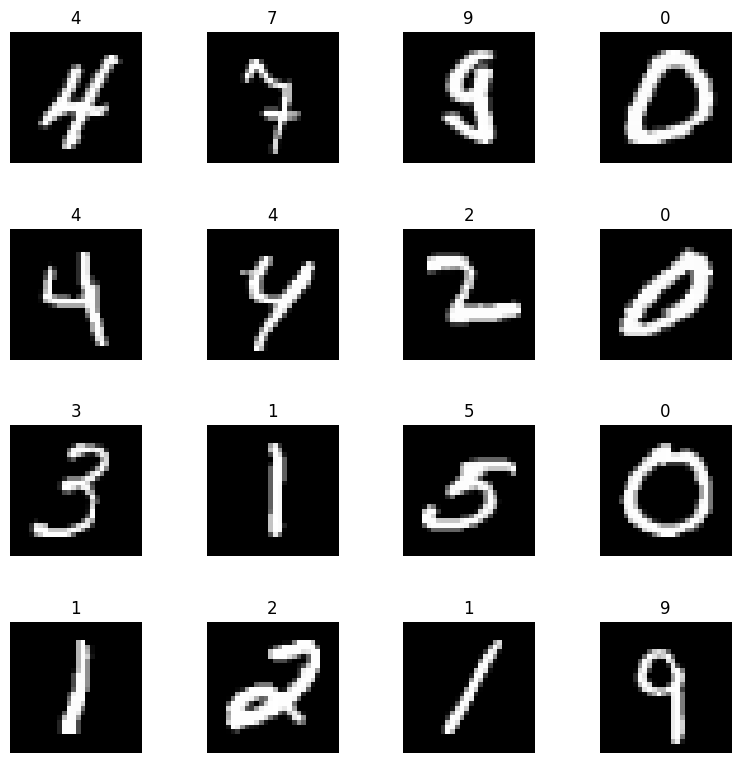

In [185]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.tight_layout(pad=1.0)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(X_train.shape[0])
    X_random_reshaped = X_train[random_index].reshape((28, 28))
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(int(y_train[random_index]))
    ax.set_axis_off()

plt.show()

Build the Neural Network

In [186]:
tf.random.set_seed(1000)
model = Sequential(
    [
        tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model"
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [187]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the Model and Fit

In [188]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,y_train,
    epochs=45
)

Epoch 1/45
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4039
Epoch 2/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1975
Epoch 3/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1625
Epoch 4/45
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1415
Epoch 5/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1264
Epoch 6/45
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1151
Epoch 7/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067
Epoch 8/45
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0995
Epoch 9/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0933
Epoch 10/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889
Epoch 11/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848
Epoch 12/45
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0799


Training Loss

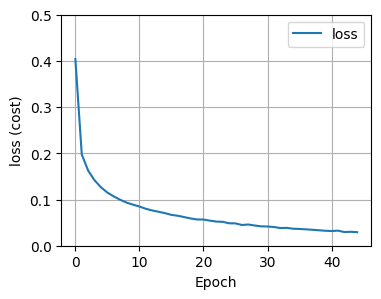

In [189]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 0.5])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

Example Prediction

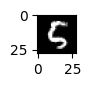

In [190]:
example_image = X_train[2000]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
X_reshaped = example_image.reshape((28,28))
# Display the image
ax.imshow(X_reshaped, cmap='gray')
plt.show()

In [191]:
prediction = model.predict(example_image.reshape(1,784))
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

1/1 [==============================] - 0s 55ms/step
 predicting a Two. Probability vector: 
[[3.7395558e-03 2.9346991e-14 2.0006082e-10 4.1494957e-07 1.6333239e-08
  9.9401516e-01 2.2375803e-03 3.1363301e-10 3.9265983e-06 3.2448806e-06]]
Total of predictions: 1.000
np.argmax(prediction_p): 5


Model Training and Testing Accuracy

In [192]:
from sklearn.metrics import accuracy_score

# Assuming `model` is your trained model, `X_train` is your training data, and `y_train` is your true labels
predictions = model.predict(X_train)
yhat = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_train, yhat)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


predictions = model.predict(X_test)
yhat = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, yhat)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

1875/1875 [==============================] - 3s 1ms/step
Training Accuracy: 99.05%
313/313 [==============================] - 1s 2ms/step
Testing Accuracy: 96.08%
